# Stroke Prediction Dataset

Data Source - https://www.kaggle.com/fedesoriano/stroke-prediction-dataset


## Loading the Data and Studying it -  

In [6]:
# loading all the basic libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
# Importing the data from Kaggle as a csv file and converting it into a Pandas DataFrame:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Viewing the snapshot of first 5 rows of the loaded dataset:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


A snapshot of the dataset shows it to be a mix of categorical and numerical variables. The column 'stroke' appears to be the target column which would become our target variable (y) when selecting models. 

Also the target variable is a binary classification column with labels 0 ('not at risk of stroke') and 1 ('at risk of stroke'). This would form the basis of predicitons in future.

As some features are categorical I would need to use one-hot encoding before training different models.

In [8]:
# Checking the size of dataset - total rows and columns:
data.shape

(5110, 12)

In [9]:
# Getting the basic information about the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
# Getting a statistical summary of the dataset (rounded to 2 decimals):
data.describe().round(2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [11]:
# Exploring the unique values in each column of dataset - using a for loop:
for col in data.columns:
    print(col)   # printing the column name
    print(data[col].unique()[:5])  # viewing the first 5 unique values from each column
    print(data[col].nunique())   # total count of unique values in the column
    print()  # adding a line break between column data

id
[ 9046 51676 31112 60182  1665]
5110

gender
['Male' 'Female' 'Other']
3

age
[67. 61. 80. 49. 79.]
104

hypertension
[0 1]
2

heart_disease
[1 0]
2

ever_married
['Yes' 'No']
2

work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
5

Residence_type
['Urban' 'Rural']
2

avg_glucose_level
[228.69 202.21 105.92 171.23 174.12]
3979

bmi
[36.6  nan 32.5 34.4 24. ]
418

smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
4

stroke
[1 0]
2



## Data Cleaning and Formatting - 

#### Formatting Columns - 

In [12]:
# Formatting the column names and row values to lower case:
data.columns = data.columns.str.lower()
data['smoking_status'] = data['smoking_status'].str.lower()
data['work_type'] = data['work_type'].str.lower()
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,self-employed,Rural,174.12,24.0,never smoked,1


#### Missing Values Detection and Imputation - 

In [13]:
# Getting the sum count of missing values in each column:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
# Imputing missing values in BMI column with mean BMI values:
data['bmi'] = data['bmi'].fillna(np.mean(data['bmi']))

# Re-checking the missing values in dataset:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Dealing with Irrelevant Values - 

In [15]:
# Dropping id column from dataset:
data.drop(columns=['id'], inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,self-employed,Rural,174.12,24.000000,never smoked,1


In [16]:
# Getting a count of gender column values:
data.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

We see that the gender column has one row with Other category. As this row is irrelevant we would not delete the row but replace its gender value with the mode of gender column. 

In [17]:
# Getting the mode of gender column:
gender_mode = list(data.gender.mode().values)[0]

# Replacing 'Other' gender category row to mode of gender column:
data['gender'] = data['gender'].replace('Other', gender_mode)

In [18]:
# Re-checking the count of gender column values after imputation:
data.gender.value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

We replace the 'Other' gender category row with mode value which increases value count for Female rows by 1 to 2995 rows.

#### Separating Numerical anf Categorical Features for use in Training ML Models  - 

In [19]:
# Separating numerical variable columns and categorical variable columns from the dataset:
numerical = ['age', 'avg_glucose_level', 'bmi']

# remaining columns are categorical variable columns:
categorical = ['gender','hypertension','heart_disease', 'ever_married', 'work_type', 
                        'residence_type','smoking_status']

## Exploratory Data Analysis (EDA) - 

Now that the dataset has been cleaned and formatted we exlore it by performing some Exploratory Data Analysis and draw insights from different visualizations created. 

Below are some key questions answered about Stroke Prediction dataset:-

##### Ques 1 - Who are at most risk of experiencing stroke and who are at least risk?

D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


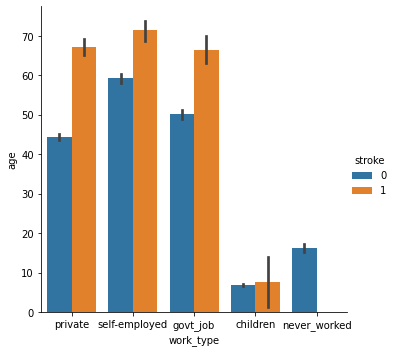

In [20]:
# Visualizing the relation between work_type, age and risk of stroke:
sns.factorplot(x="work_type", y="age", hue="stroke", data=data, kind="bar")
plt.show()

People with a higher risk of having stroke, were self-employed, in private or government jobs. While those with no work experience and childern had lower risk of a stroke. 

Also, there was a high association of work_type feature with age.

D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


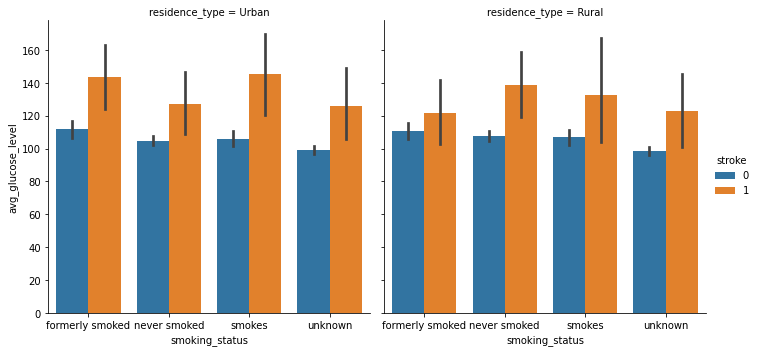

In [22]:
# Visualizing the relation between smoking habits, glucose levels and risk of stroke:
sns.factorplot(x='smoking_status',y='avg_glucose_level',hue = 'stroke' ,data=data, kind='bar',col='residence_type')
plt.show()

People with a higher risk of stroke are more likely to be smokers or smoked formerly. They also tend to have higher average glucose levels.

Also, this pattern can be seen in both residential settings - Rural as well as Urban.

##### Ques 2 - What age/avg_glucose_level/bmi level people have a likelihood of experiencing stroke?

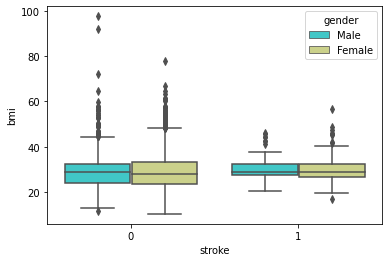

In [24]:
# Visualizing the relation between gender, bmi levels and risk of stroke:
sns.boxplot(x='stroke',y='bmi',data=data,palette='rainbow',hue='gender')
plt.show()

People with a higher risk of stroke, irrespective of being male or female had slightly higher bmi levels. Although, there were large set of outliers in each case.

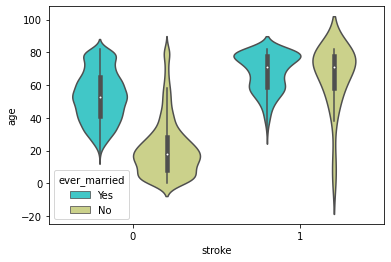

In [25]:
# Visualizing the relation between marital status, age and risk of stroke:
sns.violinplot(x="stroke", y="age", data=data,palette='rainbow',hue='ever_married')
plt.show()

People that ever married had a higher risk of having stroke. Also, people with stroke have higher mean age.

#### Ques 3 - Which were the most highly correlated features with stroke?

To answer this question I computed the correlation of Stroke variable separately with Numerical features & Categorical features.

##### Correlation with Numerical Features - 

Correlation with numerical features is calculated using a Heatmap.

In [28]:
# Assigning the numerical features to a variable:
numeric = ['age','avg_glucose_level','bmi']

In [43]:
# Measuring the correlation of stroke variable with numerical features - using corrwith():
data[numeric].corrwith(data.stroke).round(3)

age                  0.245
avg_glucose_level    0.132
bmi                  0.039
dtype: float64

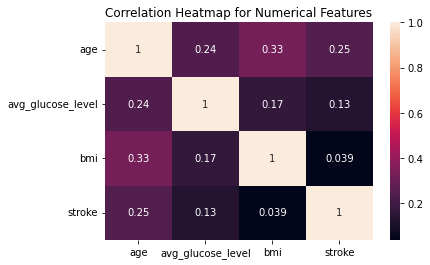

In [42]:
# Creating a correlation heatmap of relation among all numerical features and stroke variable:
numerical_with_stroke = ['age','avg_glucose_level','bmi', 'stroke']
heatmap = sns.heatmap(data[numerical_with_stroke].corr(), annot=True)

# Adding a title to the plot:
heatmap.set_title('Correlation Heatmap for Numerical Features')
plt.show()

From the above computation of correlation between stroke and numerical features we see that 'age' column has the highest correlation with stroke.

##### Correlation with Categorical Features - 

Correlation with categorical features is calculated using a Chi-square test.

In [44]:
# Chi-square test between categorical features and Stroke variable to find the correlation - 
# H0: The variables are not correlated with each other. 
# importing the required function:
from scipy.stats import chi2_contingency

# looping through each of the categorical features in dataset:
for i in ['gender','ever_married', 'work_type', 'residence_type','smoking_status']:
    
    # Cross-tabulation between Stroke and categorical feature:
    CrosstabResult = pd.crosstab(index=data[i],columns=data['stroke'])
    
    # performing Chi-sq test:
    ChisqResult = chi2_contingency(CrosstabResult)
    
    # p-value is the probability of H0 being True, if p-value > 0.5, we accept HO - 
    print(i,'---->', 'p-value of Chi-sq test is:', round((ChisqResult[1]),4))

gender ----> p-value of Chi-sq test is: 0.558
ever_married ----> p-value of Chi-sq test is: 0.0
work_type ----> p-value of Chi-sq test is: 0.0
residence_type ----> p-value of Chi-sq test is: 0.2983
smoking_status ----> p-value of Chi-sq test is: 0.0


From the above Chi-square computations we find that for categorical feature 'gender', p-value > 0.5 so we accept the null hypothesis and say that 'gender' is not correlated to risk of stroke. 

For all other features, 'work_type', 'ever_married', 'smoking_status' and 'residence_type', respective p-value < 0.5 so, we reject the H0 and say they are correlated with risk of stroke variable.

###### Regardless of patient’s gender, and where they stayed (Rural or Urban), they have the same likelihood to experience stroke.

## Setting up the validation framework - 


#### Splitting the dataset & Defining Feature Matrix and Target Variable -

In [45]:
from sklearn.model_selection import train_test_split

# splitting the dataset using sklearn into 60-20-20:
# Step 1 - splitting dataset into full train and test subsets first:
df_full_train, df_test = train_test_split(data, test_size=0.2,random_state=1) 

# Step 2 - splitting full train subset again into training set and validation set:
df_train, df_val = train_test_split(df_full_train, test_size=0.25,random_state = 1)

# checking the size of 3 subsets:
df_train.shape, df_val.shape, df_test.shape

((3066, 11), (1022, 11), (1022, 11))

In [46]:
# Resetting indices for each of the subset: 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [47]:
# Getting our target variable column ('stroke') subsets as respective Numpy arrays:
y_train = df_train.stroke.values
y_val = df_val.stroke.values
y_test = df_test.stroke.values

In [48]:
# Deleting 'stroke' column from feature matrix subsets:
del df_train['stroke']
del df_val['stroke']
del df_test['stroke']

In [49]:
# Re-checking the size of 3 subsets after deleting the target column:
df_train.shape, df_val.shape, df_test.shape

((3066, 10), (1022, 10), (1022, 10))

#### Feature Importance -

To understand the importance of fetaures in dataset Mutual Information metric is computed for different features with the stroke variable.


In later part of this Notebook I have also computed Feature importance from different ML models using scikit-learn parameters.

In [50]:
# Implementing mutual information in sklearn:
from sklearn.metrics import mutual_info_score

# Computing the Mutual information score for all feature columns - using apply() function:
# as apply() function takes only one argument we need to wrap mutual_info_score function into a function:
# Step 1 - embedding the mutual_info_score function in another function - 
def mutual_info_stroke_score(series):
    return mutual_info_score(series, df_full_train.stroke)

In [52]:
# Step 2 - calling above function in apply() function so as to apply it to each column from df - 
mi = df_full_train[categorical + numerical].apply(mutual_info_stroke_score)  # here applied only to categorical columns

# getting the mutual information scores for features sorted in descending order and rounded to 3 decimals:
round(mi.sort_values(ascending=False),3)

D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\sklearn\metrics\cluster\_supervised.py:58: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


avg_glucose_level    0.170
bmi                  0.046
age                  0.043
work_type            0.006
hypertension         0.006
heart_disease        0.006
ever_married         0.005
smoking_status       0.002
residence_type       0.000
gender               0.000
dtype: float64

From the above output we see that avg_glucose_level is the most important feature while gender is the least important.

#### Difference & Risk Ratio - 

Risk Ratios or relative risk, is a metric that measures the risk-taking place in a particular group and comparing the results with the risk-taking place in another group. Here it helps in finding which categories of people are more at a risk of getting stroke.

In [165]:
# Looking at the stroke rate – percentage of users getting stroke as a mean of stroke column:
global_stroke_rate = df_full_train.stroke.mean()  
round(global_stroke_rate,2)

0.05

In [166]:
from IPython.display import display  # helps display each loop output not just last one

# Replicating above calculations of Difference and Risk Ratio for each column of categorical variables in dataset 
# - using for loop:
for c in categorical:
    print(c)
    # Step 1 - grouping the stroke data by gender and aggregting to get average and count for each gender subgroup:
    df_group = df_full_train.groupby(c).stroke.agg(['mean','count'])
    
    # Step 2 - caluclating the difference between global stroke and each group stroke value as a column 'diff' in df:
    df_group['diff'] = df_group['mean'] - global_stroke_rate   # mean gives us the stroke rate for each gender

    # Step 3 - caluclating the Risk ratio for each group stroke value as a column 'risk' in df:
    df_group['risk'] = df_group['mean'] / global_stroke_rate

    # printing whold df:
    display(df_group)
    print()   # adding line breaks between loops
    print()   # adding line breaks between loops

gender


,mean,count,diff,risk
gender,,,,
Female,0.047919,2379,0.001686,1.036477
Male,0.043885,1709,-0.002348,0.949223




hypertension


,mean,count,diff,risk
hypertension,,,,
0,0.037649,3692,-0.008584,0.814333
1,0.126263,396,0.080030,2.731014




heart_disease


,mean,count,diff,risk
heart_disease,,,,
0,0.039576,3866,-0.006657,0.856010
1,0.162162,222,0.115929,3.507508




ever_married


,mean,count,diff,risk
ever_married,,,,
No,0.019244,1403,-0.026988,0.416251
Yes,0.060335,2685,0.014102,1.305028




work_type


,mean,count,diff,risk
work_type,,,,
children,0.003552,563,-0.042680,0.076837
govt_job,0.046065,521,-0.000168,0.996374
never_worked,0.000000,19,-0.046233,0.000000
private,0.049441,2326,0.003208,1.069393
self-employed,0.072838,659,0.026605,1.575451




residence_type


,mean,count,diff,risk
residence_type,,,,
Rural,0.042289,2010,-0.003944,0.914686
Urban,0.050048,2078,0.003815,1.082522




smoking_status


,mean,count,diff,risk
smoking_status,,,,
formerly smoked,0.071629,712,0.025396,1.549313
never smoked,0.047428,1497,0.001195,1.025854
smokes,0.046178,628,-0.000055,0.998820
unknown,0.030376,1251,-0.015857,0.657015


Above calculations show interesting facts about stroke patients - like people with hypertension, heart disease, those living in Urban setting are more likely to experience stroke than others.

It helps us find categories or variables which would help or not in analyzing stroke cases and can be used in making predictions using ML algorithms.

## Model Selection, Evaluation & Parameter Tuning - 

After splitting the stroke prediction dataset, identifying the feature matrix and target variable its time for model selection and evaluation. As the target variable was binary (0 and 1) I used different Supervised Learning algorithms for Classification on the dataset.

All the categorical features were encoded using DictVectorizer to be used further in training different models and making predictions. DictVectorizer helped in transforming lists of feature-value mappings to vectors i.e., feature matrix into dictionaries for training and predicting on subsets.

During model selection and evaluation I first trained the model on the training subset then made prediction on the validation subset. The testing subset was completely left untouched for use by the Final Model. Models were evaluated using AUC score, f1_score, Confusion matrix and Classification Report also in some cases.

While using different models I also tuned each model with its different parameters so as to improve model performance and optimize predictions. Then the final model with most optimal parameter is selected for each model type. 

#### Model 1 - Logistic Regression 

Let’s start with logistic regression which uses a logistic function to predict a binary dependent variable. Let’s define a logistic regression object, fit our model, and evaluate performance:

In [53]:
# Importing necessary libraries for the model:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

# Turning training subset df into a list of dictionaries:
train_dicts = df_train.to_dict(orient='records')

# Turning list of dictionaries into feature matrix
# training our DictVectorizer instance:
dv = DictVectorizer(sparse=False)

# fitting and transforming the full_train subset:
X_train = dv.fit_transform(train_dicts)   

# Combined fit and transform dictionary - for validation dataset:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

# only transforming DictVectorizer on the validation set:
X_val = dv.transform(val_dicts)

# Intitiating the model and training it on our full train subset:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

D:\Anaconda_install_files\envs\ml-zoomcamp\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=1)

In [54]:
# Computing prediction probability on training set:
y_pred_train = lr.predict_proba(X_train)[:,1]

# Computing prediction probability on validation set:
y_pred = lr.predict_proba(X_val)[:, 1]

In [60]:
# Evaluating the model using different metrics:
from sklearn.metrics import confusion_matrix

rounded_log_reg =  [np.round(x) for x in y_pred]
print('Roc auc score for simple logistic regression is {:.1%}'.format(roc_auc_score(y_val, y_pred)))
cm = confusion_matrix(y_val, rounded_log_reg)
print(cm)

Roc auc score for simple logistic regression is 83.9%
[[982   0]
 [ 40   0]]


The AUC score for Logistic Regression is quite good at 83.9% but the confusion matrix output summarizes very poor classification of correct predictions.

Feature Importance for Logistic Regression -

In [61]:
## Summarizing feature importance -
# Joining the feature_names with respective coefficients - using zip function:
feature_weights = dict(zip(dv.get_feature_names(), lr.coef_[0].round(3)))

# Sorting feature coefficients in descending order:
import operator
sorted_d = dict(sorted(feature_weights.items(), key=operator.itemgetter(1),reverse=True))
sorted_d

{'heart_disease': 0.496,
 'hypertension': 0.246,
 'age': 0.067,
 'avg_glucose_level': 0.004,
 'bmi': -0.009,
 'work_type=never_worked': -0.045,
 'work_type=govt_job': -0.37,
 'work_type=private': -0.405,
 'smoking_status=unknown': -0.422,
 'smoking_status=formerly smoked': -0.471,
 'smoking_status=smokes': -0.62,
 'work_type=children': -0.673,
 'smoking_status=never smoked': -0.709,
 'work_type=self-employed': -0.73,
 'ever_married=No': -0.878,
 'gender=Female': -1.058,
 'residence_type=Urban': -1.081,
 'residence_type=Rural': -1.141,
 'gender=Male': -1.164,
 'ever_married=Yes': -1.344}

When computing feature importance for Logistic regression model through coefficients it is found that a change in features like heart disease and hypertension appear to impact the risk of stroke the most while changes in marital status, gender and residence type appear to affect the least.

In [62]:
# Calculating AUC (Area under the ROC Curve) score for the model -
from sklearn.metrics import roc_auc_score

# computing the auc score on training set:
print('AUC train: %.5f' % roc_auc_score(y_train, y_pred_train))

# computing the auc score on validation set:
print('AUC val: %.5f' % roc_auc_score(y_val, y_pred))

AUC train: 0.83909
AUC val: 0.83900


We can see above that the AUC score from Logistic Regression on both the training and validation set is almost same and around 83.9%. 

#### Model 2 - Decision Trees for Classification

Let’s use a Tree-based model Decision Tree for Classification to predict our binary dependent variable. These algorithms make predictions by going through each and every feature in the data set, one-by-one. 

Let's define a decision tree classifier object, fit our model, and evaluate performance:

In [63]:
from sklearn.tree import DecisionTreeClassifier
# training our Decison tree for classification model:
dt = DecisionTreeClassifier(random_state=1)     # max_depth ----> default = None

# turning our training df into a list of dictionaries:
train_dicts = df_train.to_dict(orient='records')

# turning list of dictionaries into feature matrix
# training our DictVectorizer instance:
dv = DictVectorizer(sparse=False)

# fitting and transforming the full_train subset:
X_train = dv.fit_transform(train_dicts)   

# Combined fit and transform dictionary - for validation dataset:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

# only transforming DictVectorizer on the validation set:
X_val = dv.transform(val_dicts)


dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:,1]

# computing the auc score on training dataset:
y_pred_train = dt.predict_proba(X_train)[:,1]

print('AUC train: %.5f' % roc_auc_score(y_train, y_pred_train))
# computing the auc score on validation dataset:
print('AUC val: %.5f' % roc_auc_score(y_val, y_pred))

AUC train: 1.00000
AUC val: 0.60463


We can see above that the AUC score from Decision Tree Classifier on our training set is 1.0 while on validation set it is 0.60 or 60.46%. 

This appears to be an Overfitting problem as the model outperforms on training or seen data, but works poorly on new data.  In decision trees, over-fitting occurs when the tree is designed so as to perfectly fit all samples in the training set. I will try to overcome this problem during parameter tuning by pruning the tree using max_depth etc.

Feature Importance for Decision Trees -

In [64]:
## Summarize feature importance
# get importance and respective feature names as a dictionary:
importance = dt.feature_importances_
feature_imp = dict(zip(dv.get_feature_names(), importance.round(3)))

# sorting feature coefficients in descending order:
import operator
sorted_d2 = dict( sorted(feature_imp.items(), key=operator.itemgetter(1),reverse=True))
sorted_d2

{'avg_glucose_level': 0.275,
 'bmi': 0.242,
 'age': 0.175,
 'smoking_status=smokes': 0.04,
 'heart_disease': 0.036,
 'hypertension': 0.036,
 'gender=Female': 0.028,
 'residence_type=Urban': 0.026,
 'smoking_status=unknown': 0.026,
 'smoking_status=formerly smoked': 0.023,
 'gender=Male': 0.02,
 'residence_type=Rural': 0.015,
 'smoking_status=never smoked': 0.014,
 'work_type=govt_job': 0.014,
 'work_type=self-employed': 0.01,
 'work_type=private': 0.008,
 'ever_married=Yes': 0.006,
 'ever_married=No': 0.004,
 'work_type=children': 0.0,
 'work_type=never_worked': 0.0}

When computing feature importance for Decision trees it is found that features like avg_glucose_level and bmi appear to be most important for predicting the risk of stroke while marital status, work_type for children and unemployed appear to be the least important in the dataset.

##### Decision trees Parameter Tuning - 

Below were some parameters tuned for Decision Tree Classifier:-

selecting max_depth - The maximum depth of the tree. 

selecting min_samples_leaf - The minimum number of samples required to be at a leaf node.

selecting max_features - The number of features to consider when looking for the best split.

In [65]:
## Selecting best max_depth parameter - 
# running the Decision tree classifier model for different max_depth values - 
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:               # None here means no restrictions
    dt = DecisionTreeClassifier(random_state=1, max_depth=d)
    
    # train model on train sets:
    dt.fit(X_train, y_train)
    
    # predict on validation set:
    y_pred = dt.predict_proba(X_val)[:,1]
    
    # compute auc score on validation set:
    auc = roc_auc_score(y_val, y_pred)
    
    # printing the max_depth value and auc score for each max_depth value:
    print('%4s -> %.3f' % (d, auc))

   1 -> 0.743
   2 -> 0.773
   3 -> 0.804
   4 -> 0.813
   5 -> 0.738
   6 -> 0.694
  10 -> 0.629
  15 -> 0.580
  20 -> 0.605
None -> 0.605


From the results above, we see that the max_depth of 3 & 4 give us the best AUC score of around 80% for this model.

Now for each of the max_depth values we can try different min_samples_leaf values and see.

In [66]:
## Selecting best min_samples_leaf parameter - 
scores = []

for d in [3, 4, 5]:    # max_depth values 3 to 5
    
    # running the model for different min_samples_leaf values - 
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]: 
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s,random_state =1)
        
        # train model on train sets:
        dt.fit(X_train, y_train)

        # predict on validation set:
        y_pred = dt.predict_proba(X_val)[:,1]

        # compute auc score on validation set:
        auc = roc_auc_score(y_val, y_pred)

        # printing the max_depth value and auc score for each max_depth value:
        scores.append((d, s, auc))
        
# putting all the values in scores list to a DataFrame:
df_scores = pd.DataFrame(scores, columns=['max_depth','min_samples_leaf', 'auc'])

# sorting DataFrame values in descending order by auc values:
df_scores.sort_values('auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
16,4,200,0.833414
26,5,500,0.830041
17,4,500,0.830041
8,3,500,0.830041
20,5,5,0.827673


In [67]:
# creating a pivot table out of the above values - using .pivot() function with paramters rows or index, columns and values:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             3      4      5
min_samples_leaf                     
1                 0.804  0.813  0.738
2                 0.804  0.813  0.719
5                 0.804  0.799  0.828
10                0.804  0.783  0.816
15                0.804  0.813  0.817
20                0.804  0.813  0.817
100               0.808  0.812  0.808
200               0.811  0.833  0.825
500               0.830  0.830  0.830

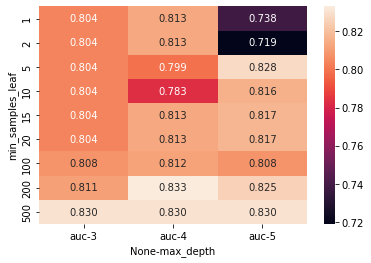

In [68]:
sns.heatmap(df_scores_pivot.round(3), annot=True,fmt = '.3f')   # round values of annotation to 3 decimals
plt.show()

Both the heatmap and the pivot table above show that the best parameters for this model is a max_depth of 4 and min_sample_leaf of 200 as both together give an AUC score of 0.833%. 

Also, parameters max_depth= 5 and min_samples_leaf = 15 to 500 also give quite a similar AUC score above 81%.

In [69]:
## Selecting best max_features parameter - 
scores = []

# running the model for different max_features values -
for f in [1, 2, 3, 4, 5, 6, 8, 10]:

    for d in [3, 4, 5]:    # max_depth values 3 to 5

         for s in [10, 15, 20, 100, 200, 500]:      # max_depth values 10 to 500
            dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s, max_features = f, random_state=1)

            # train model on train sets:
            dt.fit(X_train, y_train)

            # predict on validation set:
            y_pred = dt.predict_proba(X_val)[:,1]

            # compute auc score on validation set:
            auc = roc_auc_score(y_val, y_pred)

            # printing the max_depth value and auc score for each max_depth value:
            scores.append((d, s, f, auc))

# putting all the values in scores list to a DataFrame:
df_scores = pd.DataFrame(scores, columns=['max_depth','min_samples_leaf','max_features','auc'])

# sorting DataFrame values in descending order by auc values:
df_scores.sort_values('auc', ascending=False).head()

,max_depth,min_samples_leaf,max_features,auc
120,5,10,8,0.829175
121,5,15,8,0.828310
122,5,20,8,0.825535
106,5,200,6,0.820239
140,5,20,10,0.817375


In [71]:
# creating a pivot table out of the above values - using .pivot() function with paramters rows or index, columns and values:
df_scores_pivot = df_scores.pivot(index='max_features', columns=['max_depth', 'min_samples_leaf'], values=['auc'])
df_scores_pivot.round(3)

auc                                                   \
max_depth             3                                         4          
min_samples_leaf    10     15     20     100    200    500    10     15    
max_features                                                               
1                 0.562  0.562  0.562  0.561  0.500  0.500  0.581  0.579   
2                 0.695  0.695  0.695  0.602  0.654  0.500  0.685  0.689   
3                 0.659  0.659  0.656  0.657  0.627  0.590  0.693  0.693   
4                 0.740  0.740  0.740  0.735  0.774  0.694  0.737  0.731   
5                 0.683  0.683  0.683  0.678  0.772  0.616  0.772  0.762   
6                 0.743  0.753  0.753  0.733  0.743  0.720  0.790  0.788   
8                 0.756  0.756  0.756  0.751  0.773  0.728  0.756  0.758   
10                0.746  0.746  0.746  0.691  0.750  0.639  0.774  0.808   

                                                                          \
max_depth                                         5                        
min_samples_leaf    20     100    200    500    10     15     20     100   
max_features                                                               
1                 0.579  0.578  0.500  0.500  0.548  0.559  0.560  0.672   
2                 0.689  0.666  0.718  0.500  0.719  0.753  0.749  0.589   
3                 0.690  0.731  0.674  0.590  0.759  0.721  0.718  0.764   
4                 0.729  0.727  0.784  0.694  0.711  0.702  0.701  0.701   
5                 0.763  0.738  0.817  0.616  0.693  0.697  0.734  0.679   
6                 0.787  0.684  0.758  0.722  0.681  0.712  0.727  0.790   
8                 0.803  0.778  0.788  0.728  0.829  0.828  0.826  0.802   
10                0.806  0.616  0.757  0.701  0.803  0.790  0.817  0.784   

                                
max_depth                       
min_samples_leaf    200    500  
max_features                    
1                 0.500  0.500  
2                 0.718  0.500  
3                 0.722  0.590  
4                 0.788  0.694  
5                 0.799  0.616  
6                 0.820  0.722  
8                 0.802  0.728  
10                0.808  0.701

Combining all 3 parameters we see that **max_depth = 5, min_sample_leaf = 10 and max_features = 8** gives us the best **AUC score of 0.829 or 83%** for Decision Tree Classifier.

##### Final Decision Tree Model -

Below is the final decision tree classifier with most optimal parameters for the Stroke prediction dataset.

max_depth = 5;       min_samples_leaf = 10;   max_features = 8

In [72]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, max_features = 8, random_state=1)

# training our train set with above optimal parameters:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=8, min_samples_leaf=10,
                       random_state=1)

Visualizing our most optimal decision tree -

Below is a snapshot of the tree model generated using our Final decision tree classifier. It shows the different features in the tree and their quality of split when the tree depth is 5.

In [74]:
from sklearn.tree import export_text

print(export_text(dt, feature_names=dv.get_feature_names()))  # when dt has max_depth = 5

|--- heart_disease <= 0.50
|   |--- age <= 70.50
|   |   |--- avg_glucose_level <= 161.75
|   |   |   |--- bmi <= 25.35
|   |   |   |   |--- bmi <= 21.15
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- bmi >  21.15
|   |   |   |   |   |--- class: 0
|   |   |   |--- bmi >  25.35
|   |   |   |   |--- age <= 48.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- age >  48.50
|   |   |   |   |   |--- class: 0
|   |   |--- avg_glucose_level >  161.75
|   |   |   |--- age <= 44.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  44.50
|   |   |   |   |--- avg_glucose_level <= 171.78
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- avg_glucose_level >  171.78
|   |   |   |   |   |--- class: 0
|   |--- age >  70.50
|   |   |--- avg_glucose_level <= 75.04
|   |   |   |--- avg_glucose_level <= 72.76
|   |   |   |   |--- gender=Female <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- gender=Female >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- avg_

#### Model 3 - Random Forest for Classification (using Ensemble learning)

Next let's use an Ensemble model Random Forest for Classification to predict our binary dependent variable. Random forests are a collection of decision trees being grouped together and trained together that use random orders of the features in the dataset. 

Let's define a random forest classifier object, fit our model, and evaluate performance:

In [75]:
from sklearn.ensemble import RandomForestClassifier

# training our Random Forest for classification:
rf = RandomForestClassifier(random_state=1)    # n_estimtors ---> default=100

# turning our training df into a list of dictionaries:
train_dicts = df_train.to_dict(orient='records')

# turning list of dictionaries into feature matrix
# training our DictVectorizer instance:
dv = DictVectorizer(sparse=False)

# fitting and transforming the full_train subset:
X_train = dv.fit_transform(train_dicts)   

# Combined fit and transform dictionary - for validation dataset:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

# only transforming DictVectorizer on the validation set:
X_val = dv.transform(val_dicts)


rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:,1]

# computing the auc score on training dataset:
y_pred_train = rf.predict_proba(X_train)[:,1]

print('AUC train: %.5f' % roc_auc_score(y_train, y_pred_train))

# computing the auc score on validation dataset:
print('AUC val: %.5f' % roc_auc_score(y_val, y_pred))

AUC train: 1.00000
AUC val: 0.77154


We can see above that the AUC score from Random Forest on our training dataset is 1.0 while on validation dataset is 0.77. The score on validation set has improved over scores from decision trees (was 0.60).

Feature Importance for Random Forest - 

In [76]:
## Summarize feature importance
# get importance and respective feature names as a dictionary:
importance = rf.feature_importances_
feature_imp_rf = dict(zip(dv.get_feature_names(), importance.round(3)))

# sorting feature coefficients in descending order:
import operator
sorted_d3 = dict( sorted(feature_imp_rf.items(), key=operator.itemgetter(1),reverse=True))
sorted_d3

{'avg_glucose_level': 0.248,
 'age': 0.238,
 'bmi': 0.22,
 'heart_disease': 0.032,
 'hypertension': 0.024,
 'residence_type=Rural': 0.021,
 'residence_type=Urban': 0.021,
 'smoking_status=never smoked': 0.021,
 'work_type=private': 0.021,
 'gender=Female': 0.02,
 'gender=Male': 0.02,
 'smoking_status=formerly smoked': 0.019,
 'work_type=self-employed': 0.019,
 'smoking_status=unknown': 0.018,
 'smoking_status=smokes': 0.016,
 'work_type=govt_job': 0.015,
 'ever_married=No': 0.012,
 'ever_married=Yes': 0.011,
 'work_type=children': 0.001,
 'work_type=never_worked': 0.0}

When computing feature importance for Random forest it is found that features like avg_glucose_level, age and bmi appear to be most important for predicting the risk of stroke while marital status, work_type for children and unemployed appear to be the least important in the dataset. Similar observation was made when using Decision trees as well.

##### Random forest parameter tuning -

Below were some parameters tuned for Random Forest Classifier:-

selecting n_estimators - The number of trees in the forest.

selecting max_depth - The maximum depth of the tree.

selecting min_samples_leaf - The minimum number of samples required to be at a leaf node.

selecting max_features - The number of features to consider when looking for the best split.

In [77]:
## Selecting best n_estimators parameter - 
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n,random_state = 1)   # no. of models to use
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n,auc))

In [78]:
# putting the auc for different n_estimators values into a DataFrame:
df_scores = pd.DataFrame(scores, columns=['n_estimators','auc'])
df_scores.sort_values('auc', ascending=False).head()

,n_estimators,auc
12,130,0.799465
14,150,0.797862
15,160,0.795672
16,170,0.795227
13,140,0.794997


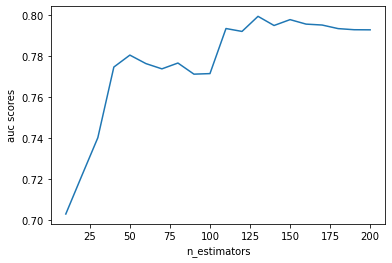

In [79]:
# plotting the DataFrame as a line plot:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel('n_estimators')
plt.ylabel('auc scores')
plt.show()

From the above plot we can see that n_estimator above 130 lead to increase in AUC score for the model to around 79-80%.

In [80]:
## Selecting best max_depth parameter - 
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state = 1)   # no. of models to use
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((n,d, auc))

In [81]:
# putting the auc for different n_estimators values into a DataFrame:
df_scores = pd.DataFrame(scores, columns=['n_estimators','max_depth','auc'])
df_scores.sort_values('auc', ascending=False).head()

,n_estimators,max_depth,auc
16,170,5,0.835820
15,160,5,0.835692
18,190,5,0.835565
19,200,5,0.835183
17,180,5,0.835031


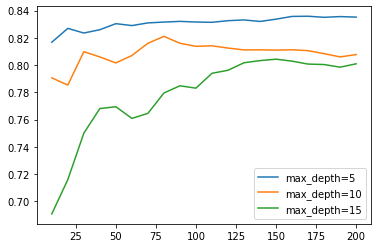

In [82]:
# plotting the DataFrame as a line plot:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]   # slicing df where max_depth = d
    plt.plot(df_subset.n_estimators, df_subset.auc, label = 'max_depth=%d' % d)
    
plt.legend()
plt.show()

Above chart shows that max_depth = 5 gives us the best AUC score for Random Forest model.

In [83]:
## Selecting best min_samples_leaf parameter - 
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=5, random_state = 1, 
                                    min_samples_leaf = s)   # taking best max_depth = 5 
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((n,s, auc))

In [84]:
# putting the auc for different n_estimators values into a DataFrame:
df_scores = pd.DataFrame(scores, columns=['n_estimators','min_samples_leaf','auc'])
df_scores.sort_values('auc', ascending=False).head()

,n_estimators,min_samples_leaf,auc
82,30,50,0.846614
87,80,50,0.843763
81,20,50,0.843317
83,40,50,0.842872
89,100,50,0.842337


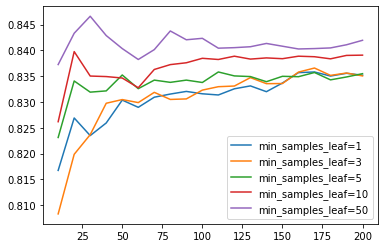

In [85]:
for s in [1, 3, 5, 10, 50]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]   # slicing df where max_depth = 5
    plt.plot(df_subset.n_estimators, df_subset.auc, label = 'min_samples_leaf=%d' % s)
    
plt.legend()
plt.show()

Above chart shows that min_samples_leaf = 50, gives us the best AUC score for Random Forest model.

In [86]:
## Selecting best max_features parameter -
scores = []

for f in [2, 4, 6, 8, 10]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=5, random_state = 1, 
                                    min_samples_leaf = 50, max_features= f)   # taking best max_depth = 5 and min_samples_leaf= 50
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((n, f, auc))

In [87]:
# putting the auc for different n_estimators values into a DataFrame:
df_scores = pd.DataFrame(scores, columns=['n_estimators','max_features','auc'])
df_scores.sort_values('auc', ascending=False).head()

,n_estimators,max_features,auc
98,190,10,0.850891
97,180,10,0.850178
99,200,10,0.850153
96,170,10,0.850127
94,150,10,0.849924


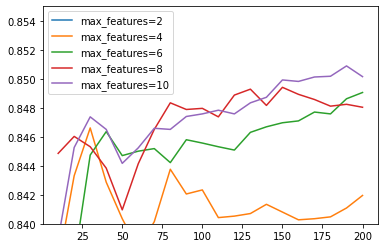

In [88]:
for f in [2, 4, 6, 8, 10]:
    df_subset = df_scores[df_scores.max_features == f]   # slicing df where max_depth = 5 and min_samples_leaf = 50
    plt.plot(df_subset.n_estimators, df_subset.auc, label = 'max_features=%d' % f)

plt.ylim(0.840, 0.855)    
plt.legend()
plt.show()

Above chart shows that max_features = 10, gives us the best AUC score for Random Forest model.

Combining all 4 parameters we see that **max_depth = 5, min_sample_leaf = 50 and max_features = 10, n_estimators = 180** give us the best AUC score of approx. 0.84 or 84% for Random Forest Classifier.

##### Final Random Forest Model -

Below is the final Random forest classifier with most optimal parameters for the Stroke prediction dataset.

max_depth = 5;       min_samples_leaf = 50;        max_features = 10,;         n_estimators = 180

In [89]:
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=50, max_features = 10, n_estimators = 180, random_state =1)

# training our train set with above optimal parameters:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       n_estimators=180, random_state=1)

#### Model 4 - XGBoost for Classification (using Gradient boosting)

Moving further, let's use an Gradient Boosting model eXtreme Gradient Boosting (XGBoost) for Classification to predict our binary dependent variable. It is a decision tree based machine learning algorithm which uses a process called boosting to help improve performance. 

Let's define a XGboost classifier object, fit our model, and evaluate performance:

In [90]:
# importing the necessary libraries and assigning the feature names to a variable:
import xgboost as xgb

features = dv.get_feature_names()

# Step 1 - wrapping our training data into a special data structure internal to XGBoost called DMatrix. It allows XGboost to train faster.
# for training set:
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names = features)

# for validation set:
dval = xgb.DMatrix(X_val, label = y_val, feature_names = features)

In [91]:
# Step 2 - training the model - 
xgb_params = {'objective': 'binary:logistic',
             'nthread': 8,
             'seed': 1,'eval_metric':'auc'}  # default eta = 0.3, max_depth = 6

# binary:logistic: logistic regression for binary classification, output probability
# eval_metric - Evaluation metrics for validation data
# When used with binary classification, the objective should be binary:logistic or similar functions that work on probability.
# nthread - Number of parallel threads used to run XGBoost

model = xgb.train(xgb_params, dtrain) 

In [92]:
# making predictions and evaluating the score on training and validation set:
y_pred = model.predict(dval)

y_pred_train = model.predict(dtrain)

print('AUC train: %.5f' % roc_auc_score(y_train, y_pred_train))

print('AUC val: %.5f' % roc_auc_score(y_val, y_pred))

AUC train: 0.94933
AUC val: 0.85579


We can see above that the AUC score from XGboost on our training dataset is 0.94 while on validation dataset is 0.856. It can be seen that the score on validation set has greatly improved from 0.60 in decision trees and 0.77 in random forest to 0.86 or 86%.

##### XGBoost parameter tuning - 

Below were some parameters tuned for XGBoost Classifier:-

selecting eta - Boosting learning rate (xgb’s “eta”).

selecting max_depth - Maximum tree depth for base learners.

selecting min_child_weight  - Minimum sum of instance weight(hessian) needed in a child.

In [93]:
# evaluating the effect of xgboost iteration (after each tree is trained) on validation data:
watchlist = ((dtrain, 'train'),(dval,'val'))

In [94]:
# Creating a function to parse output from XGBoost model:
def parse_xgb_output(output):
    results = []
    
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float((train_line.split(':'))[1])
        val = float((val_line.split(':'))[1])
        
        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [95]:
# calling the above function:
df_score = parse_xgb_output(output)

NameError: name 'output' is not defined

In [96]:
## Selecting best eta parameter -
# Step 1 - creating an empty dictionary:
scores = {}

In [106]:
%%capture output


xgb_params = {'eta':  1.0, 
             'objective': 'binary:logistic',
              'eval_metric':'auc',
              
             'nthread': 8,
             'seed': 1,
             'verbosity': 1}


model = xgb.train(xgb_params, dtrain, num_boost_round=200, 
                  verbose_eval=5, 
                  evals=watchlist)  

In [107]:
# taking the eta parameter values from above model and using it as a key for scores dictionary:
key = 'eta=%s' % (xgb_params['eta'])

# assigning output of xgboost model to score key as values:
scores[key] = parse_xgb_output(output)

scores.keys()

dict_keys(['eta=0.5', 'eta=0.3', 'eta=0.1', 'eta=1.0'])

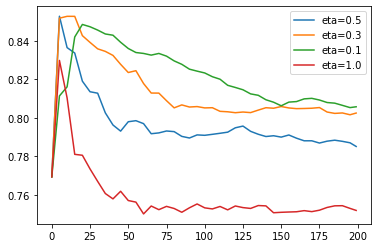

In [108]:
# plotting above AUC outputs for different eta values:
etas = scores.keys()
for eta in etas:
    df_score= scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()
plt.show()

Above plots show that although, all three models learn fast initially eta=0.1 works best as it declines quite late and also gradually than others. It learns slower but better. When it starts degrading it does not overfit as fast as others.

In [109]:
## Selecting best max_depth parameter -
# Step 1 - creating an empty dictionary:
scores = {}

In [116]:
%%capture output

xgb_params = {'eta': 0.1,      
              'max_depth': 6, 
              'min_child_weight': 1,
             'objective': 'binary:logistic',
              'eval_metric':'auc',
              
             'nthread': 8,
             'seed': 1,
             'verbosity': 1}


model = xgb.train(xgb_params, dtrain, num_boost_round=200, 
                  verbose_eval=5, 
                  evals=watchlist)   # taking eta = 0.1

In [117]:
# taking the max_depth parameter values from above model and using it as a key for scores dictionary:
key = 'max_depth=%s' % (xgb_params['max_depth'])

# assigning output of xgboost model to score key as values:
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['max_depth=3', 'max_depth=4', 'max_depth=5', 'max_depth=6'])

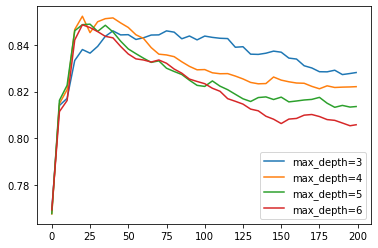

In [118]:
# plotting above AUC outputs for different max_depth values:
max_depths = scores.keys()
for max_depth in max_depths:
    df_score= scores[max_depth]
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)
plt.legend()
plt.show()

Above plot shows that a max_depth = 3 gives us the best AUC score out of all the max_depth parameters.

In [119]:
## Selecting best min_child_weight parameter -
# Step 1 - creating an empty dictionary:
scores = {}

In [128]:
%%capture output

xgb_params = {'eta': 0.1, 
              'max_depth': 3, 
              'min_child_weight': 30,
             'objective': 'binary:logistic',
              'eval_metric':'auc',
              
             'nthread': 8,
             'seed': 1,
             'verbosity': 1}


model = xgb.train(xgb_params, dtrain, num_boost_round=200, 
                  verbose_eval=5, 
                  evals=watchlist)   # taking eta = 0.1 and max_depth = 3

In [129]:
# taking the min_child_weight parameter values from above model and using it as a key for scores dictionary:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])

# assigning output of xgboost model to score key as values:
scores[key] = parse_xgb_output(output)
scores.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=10', 'min_child_weight=15', 'min_child_weight=20', 'min_child_weight=30'])

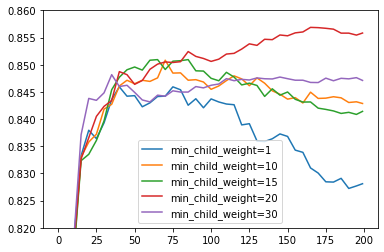

In [130]:
# plotting above AUC outputs for different min_child_weight values:
min_child_weights = scores.keys()

for min_child_weight in min_child_weights:
    df_score= scores[min_child_weight]
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)
plt.legend()
plt.ylim(0.82, 0.86)   # to zoom-in on the y-axis range between 82% and 86%
plt.show()

Above plot shows that a min_child_weight = 20 gives us the best AUC score.

Combining all 3 parameters we see that **max_depth = 3, min_child_weight = 20 and eta = 0.1** give us the best AUC score for XGBoost Classifier.

##### Final XGBoost Model -

Below is the final XGBoost classifier with most optimal parameters for the Stroke prediction dataset.
(training for 200 iterations)

eta = 0.1;     max_depth = 3;     min_child_weight = 20   

In [131]:
xgb_params = {'eta': 0.1, 
              'max_depth': 3, 
              'min_child_weight': 20,
             'objective': 'binary:logistic',
              'eval_metric':'auc',
              
             'nthread': 8,
             'seed': 1,
             'verbosity': 1}


model = xgb.train(xgb_params, dtrain, num_boost_round=200)
model

### Selecting the Best Model - 

Once the final models with most optimal parameters are finalized for each algorithm we use them to select the Best model for our Stroke prediction dataset.

####  Comparing between Final Decision tree, Final Random forest and Final XGBoost for Classification models - 


In [147]:
# Final Model 1 - Using the Final Decision Tree Classifier -
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, max_features = 8, random_state=1)

# training our train set with above final model:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=8, min_samples_leaf=10,
                       random_state=1)

In [151]:
# Evaluating Decison tree's performance - 
y_pred = dt.predict_proba(X_val)[:,1]
print('AUC on val: %.3f' % (roc_auc_score(y_val, y_pred)))

AUC on val: 0.829


In [149]:
# Final Model 2 - Using the Final Random Forest Classifier -
rf = RandomForestClassifier(max_depth=5, min_samples_leaf=50, max_features = 10, n_estimators = 180, random_state =1)

# training our train set with above final model:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       n_estimators=180, random_state=1)

In [152]:
# Evaluating Random Forest's performance - 
y_pred = rf.predict_proba(X_val)[:,1]
print('AUC on val: %.3f' % roc_auc_score(y_val, y_pred))

AUC on val: 0.850


In [145]:
# Final Model 3 - Using the Final XGBoost Classifier -
xgb_params = {'eta': 0.1, 
              'max_depth': 3, 
              'min_child_weight': 20,
             'objective': 'binary:logistic',
              'eval_metric':'auc',
              
             'nthread': 8,
             'seed': 1,
             'verbosity': 1}

# # training our train set with above final model:
model = xgb.train(xgb_params, dtrain, num_boost_round=200)
model

In [155]:
# Evaluating XGBoost's performance - 
y_pred = model.predict(dval)
print('AUC on val: %.3f' % roc_auc_score(y_val, y_pred))

AUC on val: 0.856


We see from above AUC scores on validation set for **XGBoost for Classification** gives us the ***best AUC score of 85.6%***
hence, it is chosen as the best model for our stroke prediction dataset.

#### Using our Best Model to predict on the testing set  (unseen data) - 

After choosing XGBoost for Classification as our Best model we use it to make predictions about the testing set which was set aside and left untouched unti now. This would help in analyzing how well our best model works with unseen data.

In [156]:
# resetting indices of full_train DataFrame:
df_full_train = df_full_train.reset_index(drop=True)

In [157]:
# slicing the target variable column for full_train dataset:
y_full_train = (df_full_train.stroke).astype(int).values
y_full_train

array([0, 0, 0, ..., 0, 0, 1])

In [158]:
# turning the full train df into dictionaries:
dicts_full_train = df_full_train.to_dict(orient='records')

# instantiating the vectorizer instance:
dv = DictVectorizer(sparse=False)

# turning list of dictionaries into full train feature matrix
X_full_train = dv.fit_transform(dicts_full_train)

# turning the test df into dictionaries:
dicts_test = df_test.to_dict(orient='records')

# turning list of dictionaries into testing feature matrix
X_test = dv.transform(dicts_test)

# converting full train and test matrices into DMatrix datastructure for using in XGBoost model:
dfulltrain = xgb.DMatrix(X_full_train, label = y_full_train, feature_names = dv.get_feature_names())
dtest = xgb.DMatrix(X_test, feature_names = dv.get_feature_names())

In [159]:
xgb_params = {'eta': 0.1, 
              'max_depth': 3, 
              'min_child_weight': 20,
             'objective': 'binary:logistic',
              'eval_metric':'auc',
              
             'nthread': 8,
             'seed': 1,
             'verbosity': 1}


# training our best model XGBoost for Classification on our full train set:
model = xgb.train(xgb_params, dfulltrain, num_boost_round=200)  

In [160]:
# predicting the XGBoost for Classification model on the testing set:
y_pred = model.predict(dtest)

# computing the AUC score on testing set:
print('AUC on test: %.3f' % roc_auc_score(y_test, y_pred))

AUC on test: 0.852


From the above computation we see that our best model **XGBoost for Classification model** results in an **AUC score of 85.2% on the testing set**. The testing set of our stroke prediction dataset was unseen data for this model.

This score is very close to the AUC score of 85.6% that this model gave on the validation set. Hence, we can say that our XGBoost for Classification model performs well on unseen data also.It did not overfit and generalized quite well on new data.

Thus, **XGBoost for Classification seems to be the best model** for our Stroke Prediction dataset.

## Dealing with Imbalanced Classes -

This is an additional exercise I undertook for this project which involved addressing the problem of imbalanced classes in the Stroke prediction dataset. As we can see below the stroke column had very few labels for stroke=1 ('at risk of stroke') of only 5% compared to labels for stroke=0 ('not at risk of stroke') of around 95%.

I wanted to balance the dataset and re-compute the AUC score to understand how re-sampling of labels can impact the model performance. For this I used the Synthetic Minority Oversampling Technique (SMOTE) technique to oversample the minority class label i.e. stroke=1.

In [171]:
# printing the count of stroke labels in imbalanced dataset:
data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [172]:
# printing the proportion of stroke labels in imbalanced dataset:
data.stroke.value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

#### Balancing Stroke Dataset

First I installed package using ----> pip install imbalanced-learn

In [173]:
from imblearn.over_sampling import SMOTE

# Case 1 - Oversampling our training dataset using SMOTE:
oversample = SMOTE(random_state=1)
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} '.format(y_train.shape))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))

print('\n')

print('After OverSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling, the shape of train_y: {} '.format(y_train_smote.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_smote==0)))

Before OverSampling, the shape of train_X: (3066, 20)
Before OverSampling, the shape of train_y: (3066,) 
Before OverSampling, counts of label '1': 149
Before OverSampling, counts of label '0': 2917


After OverSampling, the shape of train_X: (5834, 20)
After OverSampling, the shape of train_y: (5834,) 
After OverSampling, counts of label '1': 2917
After OverSampling, counts of label '0': 2917


After using SMOTE technique as shown above the labels in minority class '1' were oversampled from 149 to 2917. Thus the dataset was balanced to both labels being 50% each.

This balanced data labels were then used to train Decision tree, Random Forest and XGBoost models and evaluate AUC scores on the validation set for each of them.

In [175]:
# training DecisionTree for Classification model on oversampled train dataset and predicting on validation set:
from sklearn.metrics import precision_score, recall_score, f1_score

dt.fit(X_train_smote,y_train_smote)
y_pred = dt.predict(X_val)

# computing the AUC score, precision, recall and F1 Score on validation set:
print("AUC (Val Set): %.2f" % roc_auc_score(y_val, y_pred))
print("Precision (Val Set): %.2f" % precision_score(y_val, y_pred))
print("Recall (Val Set): %.2f" % recall_score(y_val, y_pred))
print("F1-Score (Val Set): %.2f" % f1_score(y_val, y_pred))

AUC (Val Set): 0.63
Precision (Val Set): 0.10
Recall (Val Set): 0.40
F1-Score (Val Set): 0.16


In [176]:
# training Random Forest for Classification model on oversampled train dataset and predicting on validation set:
rf.fit(X_train_smote,y_train_smote)
y_pred = rf.predict(X_val)

# computing the AUC score, precision, recall and F1 Score on validation set:
print("AUC (Val Set): %.2f" % roc_auc_score(y_val, y_pred))
print("Precision (Val Set): %.2f" % precision_score(y_val, y_pred))
print("Recall (Val Set): %.2f" % recall_score(y_val, y_pred))
print("F1-Score (Val Set): %.2f" % f1_score(y_val, y_pred))

AUC (Val Set): 0.68
Precision (Val Set): 0.15
Recall (Val Set): 0.47
F1-Score (Val Set): 0.23


In [177]:
# training XGBoost for Classification model on oversampled train dataset and predicting on validation set:
dtrain_smote = xgb.DMatrix(X_train_smote, label = y_train_smote, feature_names = features)
xgb_model = xgb.train(xgb_params, dtrain_smote, num_boost_round=200) 

y_pred = xgb_model.predict(dval)

# computing the AUC score, precision, recall and F1 Score on validation set:
print("AUC (Val Set): %.2f" % roc_auc_score(y_val, y_pred))

AUC (Val Set): 0.81


Evaluating the models on balanced (oversampled) data showed a decline in model performance for all the three models. Howeever, here also XGBoost for Classification outperformed the other models.

It gave an AUC score of 81% on the validation set with balanced data labels.